<div style="font-size: 30px">
<font color='blue'> <b>Personalized Anime Recommendations for 2024</b></font>

<a href="javascript:code_toggle()"><img src="https://blog.playstation.com/tachyon/2016/10/unnamed-file-6.jpg" width="1000"></a>


## Table of Contents
*  [ Project Overview](#chapter1)
    *  [1.1 Introduction](#section1_1)
    *  [1.2 Aim](#section1_2)
    *  [1.3 Objectives](#section1_3)
*  [ Importing Packages](#chapter2)
*  [ Loading Data](#chapter3)
*  [ Data Cleaning](#chapter4)
*  [ Data Preprocessing](#chapter5)
*  [ Exploratory data analysis (EDA)](#chapter6)
*  [ Model Training and Evaluation](#chapter7)
*  [ Model parameters & hyperparameters tunning](#chapter8)
*  [ Conclusion](#chapter9)



## Project Overview <a id="chapter1"><a>

### 1.1 Introduction <a id="section1_1"></a>

### 1.2 Aim<a id="section1_2"></a>

### 1.3 Objectives<a id="section1_3"></a>

## Importing Packages <a id="chapter2"><a>

<div class="alert alert-block alert-info">
<b>Importing Packages</b> is an essential step in any data analysis or machine learning project, as it allows you to access and utilize various libraries and tools to perform specific tasks. Python provides a rich ecosystem of packages for data manipulation, visualization, statistical analysis, and machine learning. Commonly used packages include pandas for data manipulation, matplotlib and seaborn for data visualization, scikit-learn for machine learning, and numpy for numerical computations. Importing the right packages at the beginning of your analysis ensures that you have the necessary tools to effectively explore and analyze your data.
</di>


In [152]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import scipy as sp
import pickle
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import Dataset, Reader, accuracy
from surprise.prediction_algorithms import SVD, SVDpp, NMF
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from recommenders.models.surprise.surprise_utils import predict
from sklearn.neighbors import NearestNeighbors
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from wordcloud import WordCloud

In [81]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

## Loading data <a id="chapter3"><a>

<div class="alert alert-block alert-info">
<b>Loading Data</b> is the initial step in the data analysis process, involving the retrieval and loading of data into a suitable format for analysis. This step is crucial as it sets the foundation for the entire analysis process. The data can be loaded from various sources such as CSV files, databases, or APIs. It is essential to ensure that the data is loaded correctly and that any initial preprocessing steps, such as handling missing values or encoding categorical variables, are performed accurately to prepare the data for further analysis.
</di>


In [2]:
# Load the data
anime_data = pd.read_csv('anime.csv')
submission_data = pd.read_csv('submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first 5 rows of each dataset
print("First 5 rows of anime_data:")
print(anime_data.head())

print("\nFirst 5 rows of submission_data:")
print(submission_data.head())

print("\nFirst 5 rows of train_data:")
print(train_data.head())

print("\nFirst 5 rows of test_data:")
print(test_data.head())

First 5 rows of anime_data:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  

First 5 rows of submission_data:
           ID  rating
0  14862_1232     5.3
1  14862_7974     4.0
2  24873_2349     

## Data Cleaning <a id="chapter4"><a>

<div class="alert alert-block alert-info">
  <b>Data cleaning</b> is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.
</div

### Data Shape

In [3]:
# Get the shape of the anime_data DataFrame
print('The shape of the anime_data:', anime_data.shape)

# Get the shape of the submission_data DataFrame
print('The shape of the submission_data:', submission_data.shape)

# Get the shape of the train_data DataFrame
print('The shape of the train_data:', train_data.shape)

# Get the shape of the test_data DataFrame
print('The shape of the test_data:', test_data.shape)

The shape of the anime_data: (12294, 7)
The shape of the submission_data: (3, 2)
The shape of the train_data: (5703555, 3)
The shape of the test_data: (633686, 2)


### Summary Information

In [4]:
# Display summary information of the anime_data DataFrame
print('The summary information of the anime_data:', anime_data.info())

# Display summary information of the submission_data DataFrame
print('\nThe summary information of the submission_data:', submission_data.info())

# Display summary information of the train_data DataFrame
print('\nThe summary information of the train_data:', train_data.info())

# Display summary information of the test_data DataFrame
print('\nThe summary information of the test_data:', test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
The summary information of the anime_data: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3 non-null      object 
 1   rating  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes

The summary information of the submission_data: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703555 entries, 0 t

### Correct Data Types

Converted episodes data type from object to int64

In [5]:
# Convert 'episodes' to numeric, forcing errors to NaN (if there are any non-numeric values)
anime_data['episodes'] = pd.to_numeric(anime_data['episodes'], errors='coerce')

# Fill NaN values with 0 or another appropriate value (e.g., mean or median of the column)
anime_data['episodes'] = anime_data['episodes'].fillna(0).astype(int)

# Verify the conversion
print(anime_data['episodes'].dtype)

int32


### Impute Null Values

In [6]:
# counting Null value
def check_null_values(df):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    has_nulls = False
    for column in df:
        null_count = df[column].isnull().sum()
        if null_count > 0:
            print(f'{column} has {null_count} null values')
            has_nulls = True

    if not has_nulls:
        print('There are no null values in the DataFrame')

# Checking null values for each DataFrame
print("Anime Data Null Values:")
check_null_values(anime_data)
print("\nSubmission Data Null Values:")
check_null_values(submission_data)
print("\nTrain Data Null Values:")
check_null_values(train_data)
print("\nTest Data Null Values:")
check_null_values(test_data)

Anime Data Null Values:
genre has 62 null values
type has 25 null values
rating has 230 null values

Submission Data Null Values:
There are no null values in the DataFrame

Train Data Null Values:
There are no null values in the DataFrame

Test Data Null Values:
There are no null values in the DataFrame


In [7]:
# Fill null values in 'rating' with a specific value like the mean rating
mean_rating = anime_data['rating'].mean()
anime_data['rating'] = anime_data['rating'].fillna(mean_rating)

# Fill 'genre' and 'type' with the most common values (mode)
most_common_genre = anime_data['genre'].mode()[0]
most_common_type = anime_data['type'].mode()[0]
anime_data['genre'] = anime_data['genre'].fillna(most_common_genre)
anime_data['type'] = anime_data['type'].fillna(most_common_type)

In [8]:
# Checking null values for Anime DataFrame after filling the null values
print("Anime Data Null Values:")
check_null_values(anime_data)

Anime Data Null Values:
There are no null values in the DataFrame


### Handling Duplicates

In [9]:
# counting duplicate value
def count_duplicate_rows(df):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df.duplicated().sum()
    return duplicate_count

# Counting duplicate rows for each DataFrame
anime_duplicates = count_duplicate_rows(anime_data)
submission_duplicates = count_duplicate_rows(submission_data)
train_duplicates = count_duplicate_rows(train_data)
test_duplicates = count_duplicate_rows(test_data)

# Printing the count of duplicate rows
print(f"The number of duplicate rows in the anime_data: {anime_duplicates}")
print(f"The number of duplicate rows in the submission_data: {submission_duplicates}")
print(f"The number of duplicate rows in the train_data: {train_duplicates}")
print(f"The number of duplicate rows in the test_data: {test_duplicates}")

The number of duplicate rows in the anime_data: 0
The number of duplicate rows in the submission_data: 0
The number of duplicate rows in the train_data: 1
The number of duplicate rows in the test_data: 0


In [10]:
# View all rows that are duplicated, including the first occurrence
all_duplicated_rows = train_data[train_data.duplicated(keep=False)]

# Display all duplicated rows, including the first occurrence
print("\nAll duplicated rows in train_data, including the first occurrence:\n")
print(all_duplicated_rows)



All duplicated rows in train_data, including the first occurrence:

         user_id  anime_id  rating
3273846    42653     16498       8
3273897    42653     16498       8


In [11]:
# Remove duplicate rows and keep the first occurrence
train_data = train_data.drop_duplicates(keep='first')

# Display the cleaned DataFrame
print("train_data after removing duplicate rows:")
print(train_data.shape)

train_data after removing duplicate rows:
(5703554, 3)


### Data Summary ###

1. Data Shape:
- `anime_data` : 12294 rows and 7 columns.
- `submission_data` : 3 rows and 2 columns.
- `train_data` : 5703555 rows and 3 columns.
- `test_data` : 633686 rows and 2 columns.
2. Data Types:

- `anime_data` :

  - anime_id: int64
  - name: object
  - genre: object
  - type: object
  - episodes: int64 # Converted from object to int64
  - rating: float64
  - members: int64
- `submission_data` :

  - ID: object
  - rating: float64
- `train_data` :

  - user_id: int64
  - anime_id: int64
  - rating: int64
- `test_data` :

  - user_id: int64
  - anime_id: int64
3. Null Values:
- `anime_data` :

   - genre has 62 null values
   - type has 25 null values
   - rating has 230 null values
   - submission_data: There are no null values.

- `train_data` : There are no null values.

- `test_data` : There are no null values.
4. Duplicates:
- `anime_data` : There are no duplicate rows.
- `submission_data` : There are no duplicate rows.
- `train_data` : There was 1 duplicate row, which has been removed. The shape of the cleaned train_data is now (5703554, 3).
- `test_data` : There are no duplicate rows.

## Exploratory Data Analysis (EDA) <a id="chapter6"><a>

<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis (EDA)</b> is a vital step in the data analysis process, aimed at understanding the underlying patterns, relationships, and structure of the data. It involves various techniques such as visualizations, summary statistics, and correlation analysis to uncover insights and identify potential issues. EDA helps in forming hypotheses, guiding further analysis, and making informed decisions about data preprocessing and modeling.
</di>


### Relationship Between Number of Members and User Ratings

C:\Users\User\AppData\Local\Temp\ipykernel_25728\552173729.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='members', y='rating', data=anime_data, palette='viridis', alpha=0.6)


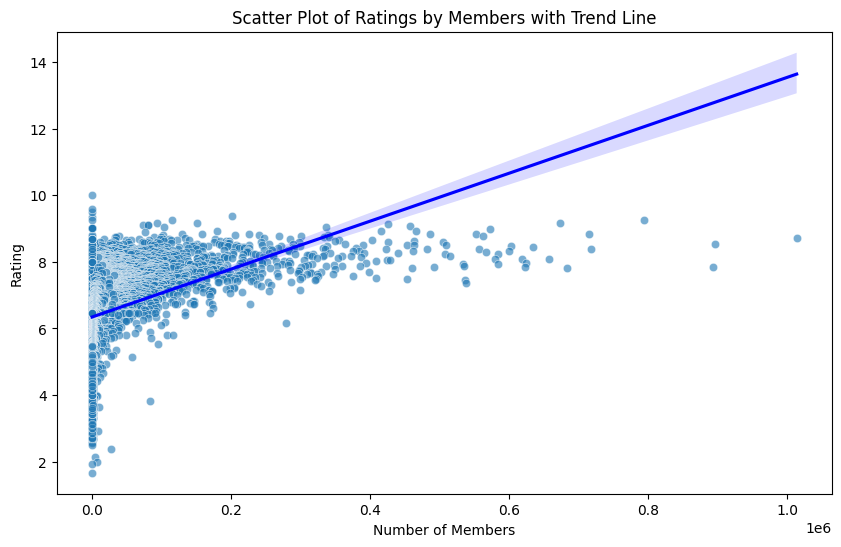

In [12]:
# Create a scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='members', y='rating', data=anime_data, palette='viridis', alpha=0.6)
sns.regplot(x='members', y='rating', data=anime_data, scatter=False, color='blue')

# Add titles and labels
plt.title('Scatter Plot of Ratings by Members with Trend Line')
plt.xlabel('Number of Members')
plt.ylabel('Rating')
plt.show()

### Distribution of Anime Type

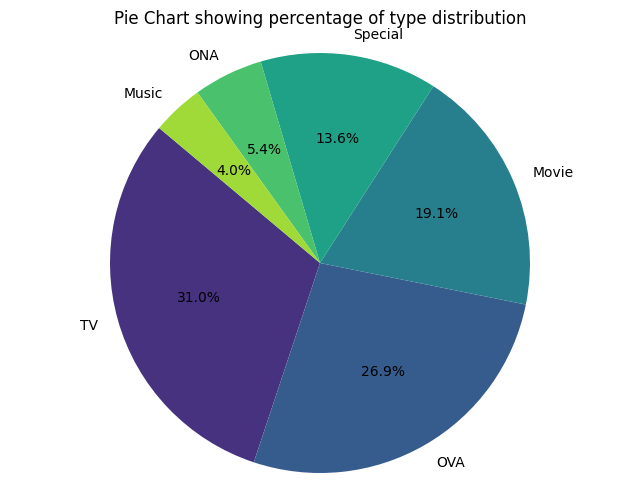

In [13]:
# Calculate the count of each anime type
type_counts = anime_data['type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))

# Get the 'viridis' color palette with as many colors as there are unique anime types
colors = sns.color_palette("viridis", len(type_counts))

# Create the pie chart with the 'viridis' color palette
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pie Chart showing percentage of type distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Most Popular Anime

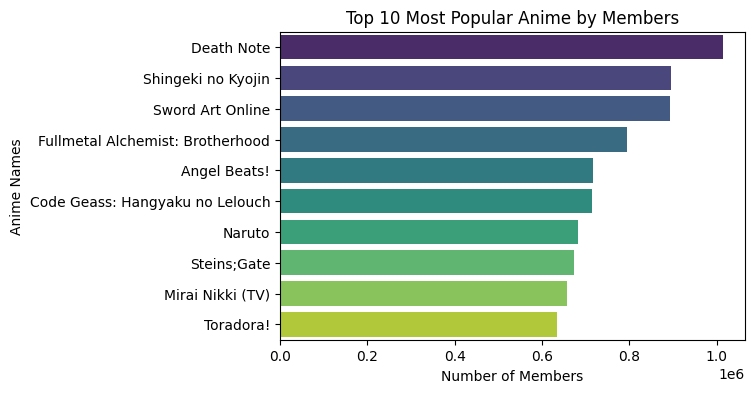

In [14]:
# Get the top 10 most popular anime by the number of members
top_10_popular = anime_data.nlargest(10, 'members')

# Sort the data in descending order for better visualization
top_10_popular = top_10_popular.sort_values(by='members', ascending=False)

# Create the bar plot with the 'viridis' color palette
plt.figure(figsize=(6, 4))
sns.barplot(x='members', y='name', data=top_10_popular, palette='viridis')
plt.title('Top 10 Most Popular Anime by Members')
plt.xlabel('Number of Members')
plt.ylabel('Anime Names')
plt.show()

### Most Common Anime Genres

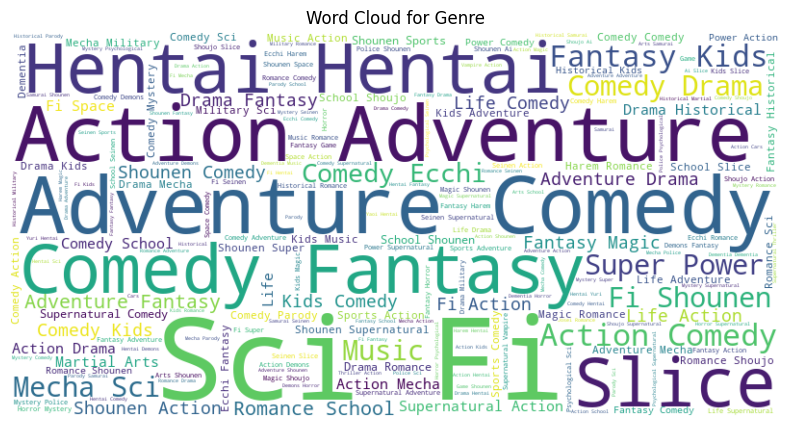

In [15]:
# Fill NaN values with an empty string and ensure the 'genre' column is of type str
anime_data['genre'] = anime_data['genre'].fillna('').astype(str)

# Combine all genres into a single string
text = ' '.join(anime_data['genre'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Genre')
plt.show()

## Data Preprocessing <a id="chapter5"><a>

<div class="alert alert-block alert-info">
  <b>Data preprocessing</b> is a fundamental step in the data analysis and machine learning pipeline, encompassing the transformation and organization of raw data into a format suitable for analysis. This process includes activities such as normalization, encoding categorical variables, feature scaling, and splitting data into training and testing sets, thereby enhancing the performance and accuracy of machine learning models.

  Here, we performed pre-processing suitable for both collaboration- and content-based recommenders. Collaboration-based recommenders suggest items based on the preferences of similar users, while content-based recommenders suggest items based on the characteristics of the items themselves.
</div>


### Preprocessing for Content-Based Recommenders

In [16]:
# Define a function to clean anime titles
def clean_titles(name):
    # Replace any character that is not a letter, number, or space with a space
    return re.sub("[^a-zA-Z0-9 ]", " ", name)

# Apply the cleaning function to the 'name' column and store the result in a new column 'clean_name'
anime_data["clean_name"] = anime_data["name"].apply(clean_titles)

# Print the first few rows of the DataFrame to check the result
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members,clean_name
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Kimi no Na wa
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fullmetal Alchemist Brotherhood
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Gintama
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Steins Gate
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Gintama 039


In [17]:
# Define a function to clean anime genre
#def clean_genre(genre):
    # Replace any character that is not a letter, number, comma, or space with a space
    #return re.sub(",", " ", genre)
# Apply the cleaning function to the 'genre' column and store the result in a new column 'clean_genre'
#anime_data["clean_genre"]

# Print the first few rows of the DataFrame to check the result
#anime_data.head()

In [18]:
# Applying the transformations
anime_data["clean_name"] = anime_data["clean_name"].apply(lambda x: x.lower())

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the anime_type column
anime_data["encoded_type"] = label_encoder.fit_transform(anime_data["type"])

# Print the first few rows of the DataFrame to check the result
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members,clean_name,encoded_type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,kimi no na wa,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,fullmetal alchemist brotherhood,5
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,gintama,5
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,steins gate,5
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,gintama 039,5


In [19]:
selected_features = ['user_id', 'clean_name', 'encoded_type', 'rating_x', 'rating_y', 'episodes']


In [20]:
# # Initialize the TfidfVectorizer
# vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')

# # Fit and transform the combined column
# tfidf = vectorizer.fit_transform(anime_data["clean_name"])

In [21]:
# Compute the cosine similarity matrix
# cosine_sim = linear_kernel(tfidf, tfidf)

In [22]:
# Construct a reverse map of anime_id and anime names
anime_id = pd.Series(anime_data['anime_id'].values, index=anime_data['clean_name']).drop_duplicates()

# Display the reverse map
print(anime_id)

clean_name
kimi no na wa                                         32281
fullmetal alchemist  brotherhood                       5114
gintama                                               28977
steins gate                                            9253
gintama  039                                           9969
                                                      ...  
toushindai my lover  minami tai mecha minami           9316
under world                                            5543
violence gekiga david no hoshi                         5621
violence gekiga shin david no hoshi  inma densetsu     6133
yasuji no pornorama  yacchimae                        26081
Length: 12294, dtype: int64


### Preprocessing for Collaborative-Based Recommenders

Construct a utility matrix to capture rating data for users. Rows in the utility matrix represent users, while columns make up the features (animes) reviewed by each user. User ratings stored in the utility matrix will be used to compare the similarity between users for contructing a collaboration-based recommender.

In [23]:
# Transform the data so that rows represent users and columns represent features
util_matrix = train_data.pivot_table(index='user_id', columns='anime_id', values='rating')

# Print the shape of the utility matrix
util_matrix.shape

(69481, 9838)

To save processing power, drop anime that have less than 10% of user reviews, as these anime will not be as informative in constructing the similarity matrix.

In [24]:
# Get the total user count
num_users = util_matrix.shape[0]

# Set the anime rating count threshold
threshold = 0.10 * num_users

# Calculate the rating count per anime
anime_review_counts = util_matrix.count()

# Select anime with less than 10% of user reviews
anime_to_drop = anime_review_counts[anime_review_counts < threshold].index

# Drop these anime from the utility matrix
util_matrix_filtered = util_matrix.drop(columns=anime_to_drop)

# Drop users with less than 5 reviews from the utility matrix
# util_matrix_filtered = util_matrix_filtered[util_matrix_filtered.count(axis=1) >= 15]

# Print the shape of the filtered utility matrix
util_matrix_filtered.shape

(69481, 132)

Normalise user ratings to a common scale between 0 and 1 to ensure fair comparison. Following normalization, replace null values with 0, transpose the data, and drop users with no ratings. It is vital that the normalisation step is done prior to replacing null values with zero, to enable the construction of a sparse matrix to save memory.

In [25]:
# Normalise ratings per user
util_matrix_norm = util_matrix_filtered.apply(lambda x: (x - np.mean(x))/(np.max(x)-np.min(x)), axis=1)

# Fill in null values with zero
util_matrix_norm.fillna(0, inplace=True)

# Drop users with no reviews (only 0s)
util_matrix_norm = util_matrix_norm.loc[(util_matrix_norm != 0).any(axis=1), :]

# Print the shape of the normalised utility matrix
util_matrix_norm.shape

(58692, 132)

## Model Training and Evaluation <a id="chapter7"><a>

<div class="alert alert-block alert-info">
  <b>Explanation:</b>  This step involves creating a mathematical or computational model that categorizes data into different classes or categories based on input features. The recommender models we trained could be broadly classified into two main categories: collaboration- and content-based recommenders. Collaboration-based recommenders suggest items based on the preferences of similar users, while content-based recommenders suggest items based on the characteristics of the items themselves.
</div>

### Collaboration-based Recommenders

#### Collaboration-based recommender using KNN

Construct a K-Nearest Neighbours model to compute the most similar users to each user of interest.

In [26]:
# Set features (rating data) to train on and convert to np array
X = util_matrix_norm.values

# Initialise the model with an appropriate number of neighbours
model_knn = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute', n_jobs=-1)

# Compute the nearest neighbours for each user based on user ratings
model_knn.fit(X)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

Save the model and accompanying data

In [27]:
with open('pickles/model_knn.pkl', 'wb') as file:
    pickle.dump(model_knn, file)

with open('pickles/util_matrix_norm.pkl', 'wb') as file:
    pickle.dump(util_matrix_norm, file)

with open('pickles/util_matrix_filtered.pkl', 'wb') as file:
    pickle.dump(util_matrix_filtered, file)


Define a function to predict user ratings for a particular anime using ratings data on users most similar to the user of interest

In [28]:
def predict_rating(user_id, anime_id, sim_threshold=0.0):

    try:
        # Select the normalised review data for the user of interest
        user_data = util_matrix_norm.loc[user_id].to_numpy().reshape(1, -1)

        # Determine the indices of the similar users and their cosine distances from the user of interest
        sim_distances, sim_user_indices = model_knn.kneighbors(user_data, n_neighbors=21)

        # Calculate the similarity scores of the similar users (sim score = 1-distance), convert to a list and remove the first element
        sim_scores = (1-sim_distances)[0].tolist()
        sim_scores.pop(0)

        # Convert the indices for similar users to a list and remove the first element
        sim_user_indices = sim_user_indices[0].tolist()
        sim_user_indices.pop(0)

        # Retrieve the ids of the similar users using the list of indices
        sim_user_ids = util_matrix_norm.reset_index().iloc[sim_user_indices]['user_id'].values.tolist()

        ratings = []
        weights = []

        # For every index, id in user_ids
        for i, sim_user_id in enumerate(sim_user_ids):
            
            # Get the similar user's rating for the anime of interest
            rating = util_matrix_filtered.loc[sim_user_id, anime_id]

            # Get the user's similarity score using the index value
            sim_score = sim_scores[i]

            # Verify if the user's rating is valid and if the similarity to the target user is below the defined threshold.
            # If both conditions are met, append the weighted rating and similarity score to the lists; otherwise, skip this user.
            if not pd.isnull(rating) and sim_score > sim_threshold:
                ratings.append(rating * sim_score)
                weights.append(sim_score)

        try:
            # Calculate the predicted rating for the user of interest
            predicted_rating = sum(ratings) / sum(weights)

        except ZeroDivisionError:
            # If there are no valid ratings, return the average predicted rating given by all users
            predicted_rating = anime_data[anime_data['anime_id'] == anime_id]['rating'].values[0]
            
    except KeyError:
        # If the user ID or anime ID was not present in the training data, return the average predicted given by all users
        predicted_rating = anime_data[anime_data['anime_id'] == anime_id]['rating'].values[0]

    return predicted_rating

View a few examples of model prediction outputs.

In [29]:
# View the predicted rating for a user whose similar users had valid ratings and a similarity score above the threshold
print(predict_rating(user_id=73515, anime_id=1, sim_threshold=0.0))

# View the predicted rating for a user that does not exist or has no ratings
print(predict_rating(user_id=73515555555, anime_id=1, sim_threshold=0.0))

# View the predicted rating for an anime with no user rating data
print(predict_rating(user_id=73515, anime_id=31730, sim_threshold=0.0)) 

9.604450498871197
8.82
6.0


Although the model above generates predictions, its takes approximately 6hrs to generate recommendations for the > 600'000 rows in `test.csv`. This will make fine-tuning the model above incredibly resource intensive. To resolve this problem, generate another model that does not use as much computational power to make predictions.

#### Collaboration-based recommender using matrix factorization

Matrix factorization models reduce the dimensionality of the user-item matrix, thereby decreasing the computational power required to generate predictions. To optimize prediction efficiency, implement a matrix factorization model, such as SVD, SVDpp, or NMF. A brief explanation of these three models is included below:

* `Singular Value Decomposition (SVD)` reduces data dimensionality by decomposing any matrix, regardless of its dimensions, into three smaller matrices: U, Σ, and V^T. The matrix U represents the user features, Σ contains the singular values indicating the importance of each feature, and V^T represents the item (anime) features based on the rating data.
* `Singular Value Decomposition ++ (SVDpp)` is a modified form of SVD designed specifically for recommender systems. It improves prediction accuracy by incorporating additional information on user-item interactions, such as implicit data on the set of items that a user has interacted with through reviews etc.
* `Non-Negative Matrix Factorization (NMF)` reduces data dimensionality by decomposing a matrix into two matrices, representing the user and item features respectively. The resulting matrices may only contain positive values, making it more useful for data where the relationship between users and items is positive.

To simplify model implementation, use the `surprise` package to construct a matrix factorization model. The `surprise` package provides straightforward methods and functions for building recommender systems. Start by instantiating a 'Reader' object to indicate the rating scale of the data. Next, create a 'Dataset' object to store the data in a format that surprise can interpret. 

In [112]:
# Instantiate Reader object
min_rating = train_data['rating'].min()
max_rating = train_data['rating'].max()
reader = Reader(rating_scale=(min_rating, max_rating))

# Instantiate Dataset sample object
sample_count = round(train_data['user_id'].count() * 0.20)
sample_data = train_data.sample(sample_count, random_state=42)
collab_data_sample = Dataset.load_from_df(sample_data, reader)

Perform a baseline comparison of three different types of matrix factorization models—SVD, SVDpp, and NMF—using a random sample of 20% of the data to select the best model for further use. Note that the following code takes approximately 13 minutes to run.

In [113]:
benchmark = []

# Compare each of the three matrix factorization models
for model in [SVD(), SVDpp(), NMF()]:

    # Evaluate model performance using 5-fold cross validation
    cv_results = cross_validate(model, collab_data_sample, measures=['RMSE'], cv=5, verbose=False)

    # Determine mean results, convert to series, and append to list
    mean_cv_results = pd.DataFrame.from_dict(cv_results).mean(axis=0)
    mean_cv_results = mean_cv_results.append(pd.Series([str(model).split(' ')[0].split('.')[-1]], index=['Model']))
    benchmark.append(mean_cv_results)
    
pd.DataFrame(benchmark).set_index('Model').sort_values('test_rmse')

,test_rmse,fit_time,test_time
Model,,,
SVDpp,1.256378,39.445144,11.639005
SVD,1.273261,20.281720,3.414364
NMF,2.251899,23.022633,2.391591


From the results above, it is apparent that the SVD and SVDpp models perform better than the NMF model. Since the SVD and SVDpp models have similar RMSE values, choose the model with the shortest test time - SVD. 

Now that the best model has been chosen, the next step is to choose the best parameters to use for this model. Choose the best parameters by making use of `GridSearchCV`. The hyperparameters to test are:
* `n_factors`: The number of factors to represent users and items. The higher the number of factors the higher the accuracy of the model; however, this comes with a risk of overfitting and lengthened training times.
* `reg_all`: The strength of regularization to prevent overfitting.
* `n_epochs`: The number of times the model will run through every observation in the dataset during training. The higher the number of epochs the higher the accuracy of the model; however, this comes with a risk of overfitting and lengthened training times.
* `lr_all`: The learning rate of the model. A higher learning rate speeds up learning time, but can result in a suboptimal solution.

In [114]:
# Set parameters for GridSearchCV
parameters = {
    'n_factors': [10, 20, 50],
    'reg_all': [0.02, 0.05, 0.1],
    'n_epochs': [20, 50, 100],
    'lr_all': [0.001, 0.005, 0.01]
}

# Fit SVD model to data
collab_svd = GridSearchCV(SVD, param_grid=parameters, n_jobs=-1)
collab_svd.fit(collab_data_sample)

# Get the best model parameters and scores
print(f'Best parameters:\n{collab_svd.best_params}')
print(f'Best scores:\n{collab_svd.best_score}')

Best parameters:
{'rmse': {'n_factors': 50, 'reg_all': 0.1, 'n_epochs': 50, 'lr_all': 0.005}, 'mae': {'n_factors': 10, 'reg_all': 0.1, 'n_epochs': 50, 'lr_all': 0.005}}
Best scores:
{'rmse': 1.2283146039185948, 'mae': 0.9326576506161409}


Train the best performing model on all the training data

In [126]:
# Build the training dataset object
collab_train = Dataset.load_from_df(train_data, reader).build_full_trainset()

# Reinstatiate the model with the best parameters
collab_svd_tuned = SVD(n_factors=10, reg_all=0.1, n_epochs=50, lr_all=0.005)

# Train the model on the training data
start_time = time.time()
collab_svd_tuned.fit(collab_train)
end_time = time.time()
print(f'Training time: {end_time-start_time} seconds')

Training time: 39.637842655181885 seconds


Generate rating predictions for all anime and user combinations in the test data

In [148]:
# Generate predictions
start_time = time.time()
predictions = predict(collab_svd_tuned, test_data, usercol='user_id', itemcol='anime_id')
end_time = time.time()
print(f'Prediction time: {end_time-start_time} seconds')

# Format the data
predictions['ID'] = predictions['user_id'].astype(str) + '_' + predictions['anime_id'].astype(str)
predictions['rating'] = round(predictions['prediction'], 2)
predictions = predictions[['ID', 'rating']]

# Store and view predictions
predictions.to_csv('submissions/collab_svd_predicted_ratings.csv', sep=',', header=True, index=False)
predictions.head(5)

Prediction time: 9.273635387420654 seconds


,ID,rating
0,40763_21405,5.77
1,68791_10504,8.45
2,40487_1281,8.88
3,55290_165,7.72
4,72323_11111,8.19


Generate a list of n-recommended anime for each user

In [197]:
def get_recommendations(user_id:int, model, n):
    # Get a list of all items
    all_items = list(train_data[~(train_data['user_id']==user_id)]['anime_id'].unique())

    # Predict ratings for all items for the given user
    test_data = pd.DataFrame(columns=['user_id', 'anime_id'])
    test_data['anime_id'] = all_items
    test_data['user_id'] = user_id
    predictions = predict(model, test_data, usercol='user_id', itemcol='anime_id')
    
    # Sort predictions by estimated rating
    recommendations = predictions.sort_values(by='prediction', ascending=False).iloc[:n, :]
    return recommendations

### Content-based Recommenders

## Matrix Factorization with Singular Value Decomposition (SVD)

In [ ]:

# Load the dataset
data = Dataset.load_from_file('anime.csv', reader=Reader(line_format='user item rating timestamp', sep=','))

# Build the training set
trainset, testset = train_test_split(data, test_size=0.25)

# Initialize SVD model
model = SVD()

# Train the model
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Compute and print RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

# Function to get recommendations for a user
def get_recommendations(user_id, model, data):
    # Get a list of all items
    all_items = set(data.raw_ratings[i][1] for i in range(len(data.raw_ratings)))
    # Predict ratings for all items for the given user
    predictions = [model.predict(user_id, item_id) for item_id in all_items]
    # Sort predictions by estimated rating
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)
    return recommendations[:10]  # Return top 10 recommendations




## Model Parameters and Hyperparameters tunning <a id="chapter8"><a>

<div class="alert alert-block alert-info">
<b>Explanation </b> Fine-tuning model parameters and hyperparameters is a crucial step in the machine learning workflow aimed at optimizing the performance of a model. Here are the primary purposes and benefits of fine-tuning:

* Improve Model Accuracy
* prevent Overfitting and Underfitting
* Enhance Model Efficiency
* Adapt to Specific Data Characteristics
* Improve Interpretability and Usability, and
* Maximize Utility of Hyperparameters.
</di>


## Conclusion <a id="chapter9"><a>

<div class="alert alert-block alert-info">
  <b>Conclusion:</b> The conclusion of a data analysis project ties together the findings and insights gained from the data. It reflects on the effectiveness of the preprocessing and cleaning steps, discusses the accuracy and reliability of the models used, and provides recommendations based on the results. A strong conclusion not only summarizes key points but also suggests future directions for research or improvements, emphasizing the overall impact and value of the analysis.
</div>
